In [1]:
import numpy as np
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

import os
pic_size = 256
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
cuda = torch.cuda.is_available()
cuda

False

In [3]:
train = MNIST('./data',train=True,download=True,transform =transforms.ToTensor())
test = MNIST('./data',train=False,download=True,transform =transforms.ToTensor())
train_data = train.data
train_data = train.transform(train_data.numpy())

In [4]:
train.data.size()
print(len(test.data.numpy() ) ) 

10000


In [5]:
test.targets.size()

torch.Size([10000])

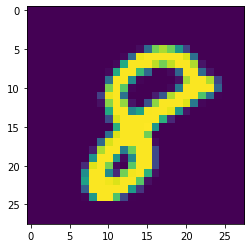

In [6]:
plt.imshow(train.data.cpu().numpy()[923])

In [7]:
class MyDataset(data.Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    
    def __len__(self):
        return len(self.Y)
    
    def __getitem__(self,index):
        X = self.X[index].float()
        Y = self.Y[index].long()
        return X,Y

In [8]:
import numpy as np
import torch
import pandas
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt


import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set_style('whitegrid')
from datetime import datetime
sys.platform
df_train = pandas.read_csv('/Users/bebik/Downloads/data/train.csv',header=None)



/Users/bebik/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [9]:
import pandas as pd
import numpy as np
import torch

def df_to_tensor(df):
    #device = get_device()
    return torch.from_numpy(df.values).float() 
    

In [10]:
def create_data_loader(df):
    target = pd.DataFrame(df[df.columns[0]] )
    print(target)
    ten_target = torch.from_numpy(target[target.columns[0]].values)
    del df[df.columns[0] ]
    ten_data = df_to_tensor(df)


    _dataset = MyDataset(ten_data,ten_target)



    test_loader_args = dict(shuffle=True,batch_size=pic_size,num_workers=0,pin_memory=True) if cuda\
    else dict(shuffle=True,batch_size=pic_size)
    loader = data.DataLoader(_dataset,**test_loader_args)
    return ten_target,loader



df_validate = pandas.read_csv('/Users/bebik/Downloads/data/validate.csv',header=None)


validate_target, validate_loader = create_data_loader(df_validate)

       0
0      1
1      0
2      1
3      0
4      0
...   ..
49995  0
49996  1
49997  0
49998  1
49999  1

[50000 rows x 1 columns]


In [11]:
df_test = pandas.read_csv('/Users/bebik/Downloads/data/test.csv',header=None)
del df_test[df_test.columns[0] ]
test_data = df_to_tensor(df_test)



In [12]:
def create_set(num,df):

    if (num == 0):
        df_train_sample = df
    else :
        df_train_sample = df.sample( n = num)
    target_sample = pd.DataFrame(df_train_sample[df_train_sample.columns[0]] )
    del df_train_sample[df_train_sample.columns[0]]
    ten_train_target = torch.from_numpy(target_sample[target_sample.columns[0]].values)
    #df_to_tensor(target)
    ten_train_data = df_to_tensor(df_train_sample)



    train_dataset = MyDataset(ten_train_data,ten_train_target)


    train_loader_args = dict(shuffle=True,batch_size=pic_size,num_workers=0,pin_memory=True) if cuda\
    else dict(shuffle=True,batch_size=pic_size)
    train_loader = data.DataLoader(train_dataset,**train_loader_args)
    return train_loader

In [13]:
# Simple_MLP([784,100,50,10])

class Simple_MLP(nn.Module):
    def __init__(self,size_list):
        super(Simple_MLP,self).__init__()
        layers=[]
        self.size_list = size_list
        for i in range(len(size_list) -2):
            layers.append(nn.Linear(size_list[i],size_list[i+1]))
            op = random.randint(0,2) 
            if (op==0):
                layers.append(nn.ReLU())
            if (op ==1): 
                layers.append(nn.ReLU())
            if (op ==2):
                layers.append(nn.ReLU())
        #layers.append(nn.Linear(size_list[-3],size_list[-2]))
        #layers.append(nn.Softmax(dim=1))
        layers.append(nn.Linear(size_list[-2],size_list[-1]))
        self.net = nn.Sequential(*layers)
        
    def forward(self,x):
        return self.net(x)

In [14]:
# define the network for training
#model = Simple_MLP([784,16,50,8,200,10])
import random
#model = Simple_MLP([120,16,200,10])
#model = Simple_MLP([120,80,40,20,12,2])

#model = Simple_MLP([120,80,60,40,20,2])
#model = Simple_MLP([120,110,106,104,100,90,88,82,80,70,60,50,40,60,80,30,20,10,8,6,4,4,2])

criterion = nn.CrossEntropyLoss()

device = torch.device( "cpu")

def create_model():
    r1 = 160
    r2 = 160
    ar = [120]
    for i in range(random.randint(1,10)):
        r1 = random.randint(4,140)
        ar.append( r1  )
        r2 = random.randint(4,140)
        ar.append(  r2 )
    ar.append(2)    
    model = Simple_MLP(ar)
    optimizer = optim.Adam(model.parameters())
    print(model)
    return model,optimizer
model,optimizer = create_model()

Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=120, out_features=102, bias=True)
    (1): ReLU()
    (2): Linear(in_features=102, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=12, bias=True)
    (7): ReLU()
    (8): Linear(in_features=12, out_features=12, bias=True)
    (9): ReLU()
    (10): Linear(in_features=12, out_features=69, bias=True)
    (11): ReLU()
    (12): Linear(in_features=69, out_features=71, bias=True)
    (13): ReLU()
    (14): Linear(in_features=71, out_features=86, bias=True)
    (15): ReLU()
    (16): Linear(in_features=86, out_features=34, bias=True)
    (17): ReLU()
    (18): Linear(in_features=34, out_features=57, bias=True)
    (19): ReLU()
    (20): Linear(in_features=57, out_features=113, bias=True)
    (21): ReLU()
    (22): Linear(in_features=113, out_features=60, bias=True)
    (23): ReLU()
    (24): Linear(in_features=60, out

In [15]:
import time
def train_epoch(model,train_loader,criterion,optimizer):
    #print(1)
    model.train()
    model.to(device)
    running_loss=0.0
    
    start_time = time.time()
    for batch_idx, (data,target) in enumerate(train_loader):
        #print(2)
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        #print(3)
        
        outputs = model(data)
        #print(outputs)
        loss = criterion(outputs,target)
        running_loss += loss.item()
        #print (outputs)
        loss.backward()
        optimizer.step()
    
    end_time = time.time()   
    running_loss /= len(train_loader)
    print("Train Loss: ", running_loss, ' Time: ', end_time-start_time)
    return running_loss



In [16]:
def test_epoch(model,test_loader,criterion):
    with torch.no_grad():
        #print(1)
        model.eval()
        model.to(device)
        
        running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0
        #print(2)
        
        for batch_idx, (data,target) in enumerate(test_loader):
            #print(3)
            data = data.to(device)
            target = target.to(device)
            outputs = model(data)
            
            _, predicted = torch.max(outputs.data,1)
            #print(predicted)
            total_predictions += target.size(0)
            correct_predictions += (predicted==target).sum().item()
            
            loss = criterion(outputs,target).detach()
            running_loss += loss.item()
        running_loss /= len(test_loader)
        acc = (correct_predictions/total_predictions)*100.0
        print('Test Loss: ',running_loss)
        print('Test Acc: ',acc,'%')
        return running_loss,acc,predicted

In [46]:
def submit_epoch(model,data):
    with torch.no_grad():
        #print(1)
        results = []
        model.eval()
        model.to(device)
        
        for batch_idx, data in enumerate(data):
            #print(3)
            data = data.to(device)
            #target = target.to(device)
            outputs = model(data)
            #print(outputs)
            #predicted = torch.max(outputs.data)
            #print (predicted)
            #result += predicted
            #total_predictions += target.size(0)
            #correct_predictions += (predicted==target).sum().item()
#            print(outputs.data)
            predicted_source, predicted = torch.max(outputs.data,0)
            #print (predicted)
            xxx = predicted.item()
            results.append(xxx)
            #loss = criterion(outputs,target).detach()
            #running_loss += loss.item()
        #running_loss /= len(test_loader)
        #acc = (correct_predictions/total_predictions)*100.0
        #print('Test Loss: ',running_loss)
        #print('Test Acc: ',acc,'%')
        return results

In [18]:

n_epoch = 5
Train_loss = []
Test_loss = []
Test_acc = []

#model2,optimizer2 = create_model()
acc1 =0
acc2 =0
for runs in range(7):
    criterion = nn.CrossEntropyLoss()
    model ,optimizer = create_model()
    best_model = model
    best_optimizer = optimizer
    best_score = 0
    for i in range(n_epoch):
        train_loader = create_set(30000,df_train)
        train_loss = train_epoch(best_model,train_loader,criterion,best_optimizer)
        test_loss,test_acc,pre = test_epoch(best_model,validate_loader,criterion)
        
        #train_loss = train_epoch(model,train_loader,criterion,optimizer2)
        #test_loss2,test_acc2,pre2 = test_epoch(model2,test_loader,criterion)
        #if (test_acc2 > test_acc):
        #    best_model = model2
        #    best_optimizer = optimizer2
        #else:
        #    best_model = model
        #    best_optimizer = optimizer
        Train_loss.append(train_loss)
        Test_loss.append(test_loss)
        Test_acc.append(test_acc)
        print('='*50,i)
        #print(pre)
    #model2 ,optimizer2 = create_model()
        

Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): ReLU()
    (2): Linear(in_features=84, out_features=106, bias=True)
    (3): ReLU()
    (4): Linear(in_features=106, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=118, bias=True)
    (7): ReLU()
    (8): Linear(in_features=118, out_features=126, bias=True)
    (9): ReLU()
    (10): Linear(in_features=126, out_features=49, bias=True)
    (11): ReLU()
    (12): Linear(in_features=49, out_features=13, bias=True)
    (13): ReLU()
    (14): Linear(in_features=13, out_features=83, bias=True)
    (15): ReLU()
    (16): Linear(in_features=83, out_features=118, bias=True)
    (17): ReLU()
    (18): Linear(in_features=118, out_features=90, bias=True)
    (19): ReLU()
    (20): Linear(in_features=90, out_features=100, bias=True)
    (21): ReLU()
    (22): Linear(in_features=100, out_features=35, bias=True)
    (23): ReLU()
    (24): Linear(in_features=3

Train Loss:  0.6918630352464773  Time:  1.1451351642608643
Test Loss:  0.6909786067446884
Test Acc:  52.32 %
================================================== 0
Train Loss:  0.6892312679250362  Time:  1.1079089641571045
Test Loss:  0.6886503912356435
Test Acc:  53.786 %
================================================== 1
Train Loss:  0.6862884446726008  Time:  1.1062407493591309
Test Loss:  0.684207304703946
Test Acc:  55.776 %
================================================== 2
Train Loss:  0.683758794756259  Time:  1.1685528755187988
Test Loss:  0.6797474349031642
Test Acc:  55.862 %
================================================== 3
Train Loss:  0.6803108388084477  Time:  1.2125036716461182
Test Loss:  0.6764833933236648
Test Acc:  57.352000000000004 %
================================================== 4
Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=120, out_features=34, bias=True)
    (1): ReLU()
    (2): Linear(in_features=34, out_features=126, bias=True)
    (

In [48]:
predicted_res = submit_epoch(best_model,test_data)

In [56]:

df = pd.DataFrame(predicted_res)
df.to_csv('/Users/bebik/Downloads/data/70_1.csv',index=False,header=None)



In [ ]:
plt.title('Training Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss/Criterion')
plt.plot(Train_loss)

In [ ]:
plt.title('Test Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss/Criterion')
plt.plot(Test_loss)

In [ ]:
plt.title('Test Accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy (%)')
plt.plot(Test_acc)